In [1]:
# ! pip install statsmodels
# !pip install patsy

import matplotlib.pyplot as plt
from patsy import dmatrices
import statsmodels.api as sm

In [2]:
dataset_nile = sm.datasets.nile.load_pandas() # negative r2 with naive models
dataset_engel = sm.datasets.engel.load_pandas() # heterosced
dataset_copper = sm.datasets.copper.load_pandas() # not COPPERPRICE

In [3]:
dataset_copper.data

,WORLDCONSUMPTION,COPPERPRICE,INCOMEINDEX,ALUMPRICE,INVENTORYINDEX,TIME
0,3173.0,26.56,0.70,19.76,0.98,1.0
1,3281.1,27.31,0.71,20.78,1.04,2.0
2,3135.7,32.95,0.72,22.55,1.05,3.0
3,3359.1,33.90,0.70,23.06,0.97,4.0
4,3755.1,42.70,0.74,24.93,1.02,5.0
5,3875.9,46.11,0.74,26.50,1.04,6.0
6,3905.7,31.70,0.74,27.24,0.98,7.0
7,3957.6,27.23,0.72,26.21,0.98,8.0
8,4279.1,32.89,0.75,26.09,1.03,9.0
9,4627.9,33.78,0.77,27.40,1.03,10.0


In [4]:
y, X = dmatrices('WORLDCONSUMPTION ~ COPPERPRICE + INCOMEINDEX + ALUMPRICE + INVENTORYINDEX + TIME', data=dataset_copper.data, return_type='dataframe')

In [5]:
# plt.scatter(X.foodexp, y, marker='.')

In [6]:
# Statistically confirm that the data is not heteroscedastic
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

In [7]:
ols = sm.OLS(y, X)
ols_result = ols.fit()

In [8]:
# residuals of a LM are not dependent on X

In [9]:
# plt.scatter(X.COPPERPRICE, ols_result.resid)

In [10]:
# statistical tests confirm this:

In [11]:
het_white(ols_result.resid, X)

(22.132882717151546,
 0.3333438279909271,
 1.5439119180477152,
 0.3649896306823901)

In [12]:
het_breuschpagan(ols_result.resid, X, robust=False)

(13.867917431785603,
 0.016470551734637028,
 1.7003845104163364,
 0.18294381219628733)

In [13]:
# Fitting models

# !pip install scikit-learn
import torch
import numpy as np
from sklearn.metrics import r2_score

from heteroscedastic import BetaGaussianMLP, BetaGaussianLM, _radius



In [14]:
torch.set_default_dtype(torch.double)
torch.set_default_tensor_type(torch.DoubleTensor)

/Users/sophiasklaviadis/miniconda3/envs/dsl/lib/python3.10/site-packages/torch/__init__.py:696: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/tensor/python_tensor.cpp:453.)
  _C._set_default_tensor_type(t)


In [15]:
torch.from_numpy(X.to_numpy())

tensor([[ 1.0000, 26.5600,  0.7000, 19.7600,  0.9800,  1.0000],
        [ 1.0000, 27.3100,  0.7100, 20.7800,  1.0400,  2.0000],
        [ 1.0000, 32.9500,  0.7200, 22.5500,  1.0500,  3.0000],
        [ 1.0000, 33.9000,  0.7000, 23.0600,  0.9700,  4.0000],
        [ 1.0000, 42.7000,  0.7400, 24.9300,  1.0200,  5.0000],
        [ 1.0000, 46.1100,  0.7400, 26.5000,  1.0400,  6.0000],
        [ 1.0000, 31.7000,  0.7400, 27.2400,  0.9800,  7.0000],
        [ 1.0000, 27.2300,  0.7200, 26.2100,  0.9800,  8.0000],
        [ 1.0000, 32.8900,  0.7500, 26.0900,  1.0300,  9.0000],
        [ 1.0000, 33.7800,  0.7700, 27.4000,  1.0300, 10.0000],
        [ 1.0000, 31.6600,  0.7600, 26.9400,  0.9800, 11.0000],
        [ 1.0000, 32.2800,  0.7900, 25.1800,  1.0000, 12.0000],
        [ 1.0000, 32.3800,  0.8300, 23.9400,  0.9700, 13.0000],
        [ 1.0000, 33.7500,  0.8500, 25.0700,  1.0300, 14.0000],
        [ 1.0000, 36.2500,  0.8900, 25.3700,  1.0800, 15.0000],
        [ 1.0000, 36.2400,  0.9300, 24.5

In [16]:
X_torch = torch.from_numpy(X.to_numpy())[:, 1:] #.unsqueeze(-1)
y_torch = torch.from_numpy(y.to_numpy()).squeeze()

In [17]:
X_torch.shape

torch.Size([25, 5])

In [18]:
n_test = int(.1 * len(X_torch))
X_test, X_train = X_torch[-n_test:], X_torch[:-n_test]
y_test, y_train = y_torch[-n_test:], y_torch[:-n_test]

In [19]:
# normalize inputs
mu = X_train.mean(dim=0)
std = torch.norm(X_train - mu, dim=0)
# mu
std

tensor([32.0407,  0.6292, 10.9975,  0.1560, 31.8119])

In [20]:
(X_train - mu).shape

torch.Size([23, 5])

In [21]:
X_train = (X_train - mu) / std
X_test = (X_test - mu) / std
X_torch = (X_torch - mu) / std

In [35]:
def save_for_plot(model):
    alpha = model.alpha
    model.eval()
    
    # t = torch.linspace(X_torch[:, 1].min(), X_torch[:, 1].max() +0.1 , 100).unsqueeze(-1)
    # print(t.shape)
    with torch.no_grad():
    
        y_pred, sigma_sq = model(X_train[:200,:])
        std_pred = sigma_sq.sqrt()
    
    # t = t.squeeze().numpy()
    y_pred = y_pred.squeeze().numpy()
    std_pred = std_pred.squeeze().numpy()

    if alpha == 1:
        # 95% confidence interval.
        a = 2*std_pred
    else:
        # 100% confidence interval.
        R = _radius(1, alpha)
        tau = (-R**2)/2 * (std_pred**2) ** (-(alpha-1) / (alpha+1))
        a = np.sqrt(-2 * tau * std_pred**2)
        
    return X_train[:200,1], y_pred, a
    

def plot_model(t, y_pred, a, ax, which="support", fill_color='C0'):
    ax.plot(t, y_pred, color='C0', label="predicted mean")

    ax.fill_between(t,
                    y_pred - a,
                    y_pred + a,
                    alpha=0.2, color=fill_color, label="predicted {}".format(which))
       
    # Plot the truth
    ax.scatter(X_train[:200,1].squeeze().numpy(), y_train[:200].squeeze().numpy(), marker='.', color='C1', label='train')
    # ax.scatter(X_test.squeeze().numpy(), y_test.squeeze().numpy(), marker='x', color='C2', label='test')

    # ax.set_ylim(-10, 370)
    ax.set_xlim(None, t[-1])

In [36]:
# baseline

torch.manual_seed(42)
bl_model = BetaGaussianLM(input_size=5, uncertainty=False, heteroscedastic=False, alpha=None)
optimizer = torch.optim.LBFGS(bl_model.parameters(), lr=.01, max_iter=100)

n_epochs = 1000

for epoch in range(n_epochs):
    # Forward pass
    
    def closure():
        optimizer.zero_grad()
        bl_model.train()
        loss = bl_model.loss(X_train, y_train)
        loss.backward()
        return loss

    optimizer.step(closure)

# evaluate R^2
y_pred_train = bl_model.predict(X_train).detach().numpy()
y_pred_test = bl_model.predict(X_test).detach().numpy()
print("R2 train {:.3f} test {:.3f}".format(
    r2_score(y_pred_train, y_train.numpy()),
    r2_score(y_pred_test, y_test.numpy())))
    
print("w", bl_model.pred_y.weight.data, "b", bl_model.pred_y.bias.data)

R2 train 0.989 test -191.103
w tensor([[  371.8333,  -182.9692, -1060.5545,   194.4375,  7394.0285]]) b tensor([5242.5391])


In [37]:
# try lbfgs

old_loss = np.inf

n_epochs = 1000

results = []

for j, alpha in enumerate([1, 4/3, 1.5, 2]):
    torch.manual_seed(42)
    model = BetaGaussianLM(input_size=5, uncertainty=True, heteroscedastic=False, alpha=alpha)
    
    model.pred_y.weight.data[:] = bl_model.pred_y.weight
    model.pred_y.bias.data[:] = bl_model.pred_y.bias
    optimizer = torch.optim.LBFGS(model.parameters(), lr=.01, line_search_fn='strong_wolfe', max_iter=100)
    
    for epoch in range(n_epochs):
        
        def closure():
            optimizer.zero_grad()
            model.train()
            loss = model.loss(X_train, y_train)
            loss.backward()
            return loss
        
        optimizer.step(closure)
            
    # evaluate R^2
    model.eval()
    y_pred_train = model.predict(X_train).detach().numpy()
    y_pred_test = model.predict(X_test).detach().numpy()

    r2 = "R2 train {:.3f} test {:.3f}".format(
        r2_score(y_pred_train, y_train.numpy()),
        r2_score(y_pred_test, y_test.numpy()))
    
    results.append((alpha, save_for_plot(model), r2)) #save_for_plot(model),

In [38]:
# [1] t, y_pred, a
# results

Text(0.5, 0, 'Standardized county population')

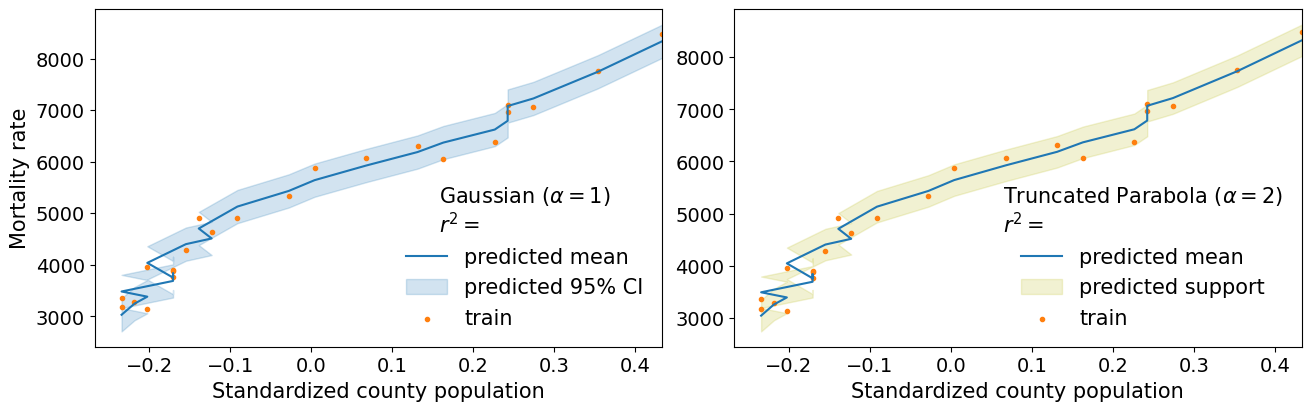

In [39]:
fig, (ax_gauss, ax_tp) = plt.subplots(1, 2, figsize=(13, 4), constrained_layout=True)

plt.rcParams['legend.title_fontsize'] = 15
plt.rcParams['legend.fancybox'] = False
plt.rcParams['legend.frameon'] = False
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plot_model(*results[0][1], ax_gauss, "95% CI", fill_color='C0')
plot_model(*results[3][1], ax_tp, "support", fill_color='C8')
ax_gauss.legend(title="Gaussian ($\\alpha=1$)\n$r^2=$", fontsize=15)
ax_tp.legend(title="Truncated Parabola ($\\alpha=2$)\n$r^2=$", fontsize=15)
ax_gauss.set_ylabel("Mortality rate", fontsize=15)
ax_gauss.set_xlabel("Standardized county population", fontsize=15)
ax_tp.set_xlabel("Standardized county population", fontsize=15)
# plt.savefig("heteroscedastic.pdf")